## Dataset download & loading

In [12]:
import kagglehub
path = kagglehub.dataset_download("wasiqaliyasir/breast-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/charles-prioux/.cache/kagglehub/datasets/wasiqaliyasir/breast-cancer-dataset/versions/1


In [13]:
import pandas as pd
import numpy as np
import os

csv_file = "Breast_cancer_dataset.csv"
df = pd.read_csv(os.path.join(path, csv_file))
display(df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Preprocessing

In [14]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)

#  M → 1 , B → 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X.columns, index=X_train.index)
X_test  = pd.DataFrame(X_test_scaled,  columns=X.columns, index=X_test.index)

display(X_train)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
10,0.518559,0.891826,0.424632,0.383925,-0.974744,-0.689772,-0.688586,-0.398175,-1.039155,-0.825056,...,0.579798,1.313242,0.466908,0.445983,-0.596155,-0.634722,-0.610227,-0.235744,0.054566,0.021837
170,-0.516364,-1.639710,-0.541349,-0.542961,0.476219,-0.631834,-0.604281,-0.303075,0.521543,-0.454523,...,-0.582459,-1.690291,-0.611934,-0.587014,0.273582,-0.814844,-0.712666,-0.323208,-0.137576,-0.904402
407,-0.368118,0.455515,-0.388250,-0.402970,-1.432979,-0.383927,-0.342175,-0.765459,-0.850857,-0.226171,...,-0.398622,0.181977,-0.475431,-0.420778,-1.622785,-0.391399,-0.431313,-0.890825,-0.675893,-0.144016
430,0.205285,0.726168,0.400330,0.070612,0.243253,2.203585,2.256094,1.213233,0.818474,0.899791,...,-0.000309,0.274191,0.513776,-0.099482,0.418538,2.865970,2.958619,1.977064,-0.075646,1.728848
27,1.243005,0.194195,1.210377,1.206652,-0.111442,0.051348,0.732962,0.713767,-0.427187,-0.822184,...,1.012835,0.223144,0.938517,0.880910,0.073201,-0.277006,0.327775,0.501859,-0.909322,-0.546249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,-0.317771,-0.232783,-0.389060,-0.377138,-0.431157,-1.228852,-0.778896,-0.499077,-1.260042,-0.586651,...,-0.623312,-0.509626,-0.685458,-0.592515,-1.495309,-1.323042,-1.070826,-0.978888,-1.471458,-1.236106
415,-0.636639,0.408851,-0.640984,-0.627123,0.121524,-0.420324,-0.779754,-0.686756,0.738810,0.026596,...,-0.674377,0.214911,-0.667004,-0.632053,0.448382,-0.232765,-0.749488,-0.492145,0.256237,-0.584819
458,-0.326162,1.332803,-0.389060,-0.387138,-0.860710,-0.986145,-0.945056,-0.791946,-0.535821,-1.181228,...,-0.410878,0.983908,-0.492128,-0.450518,-0.438408,-0.924182,-1.088339,-0.842900,-0.964901,-1.168884
476,0.009489,0.259525,0.007863,-0.114377,-0.467536,0.129341,-0.472432,-0.465023,-1.118819,-0.376969,...,0.020117,0.223144,0.124186,-0.106702,-0.715530,0.552189,-0.113138,0.275711,-0.602847,-0.305460


### EDA

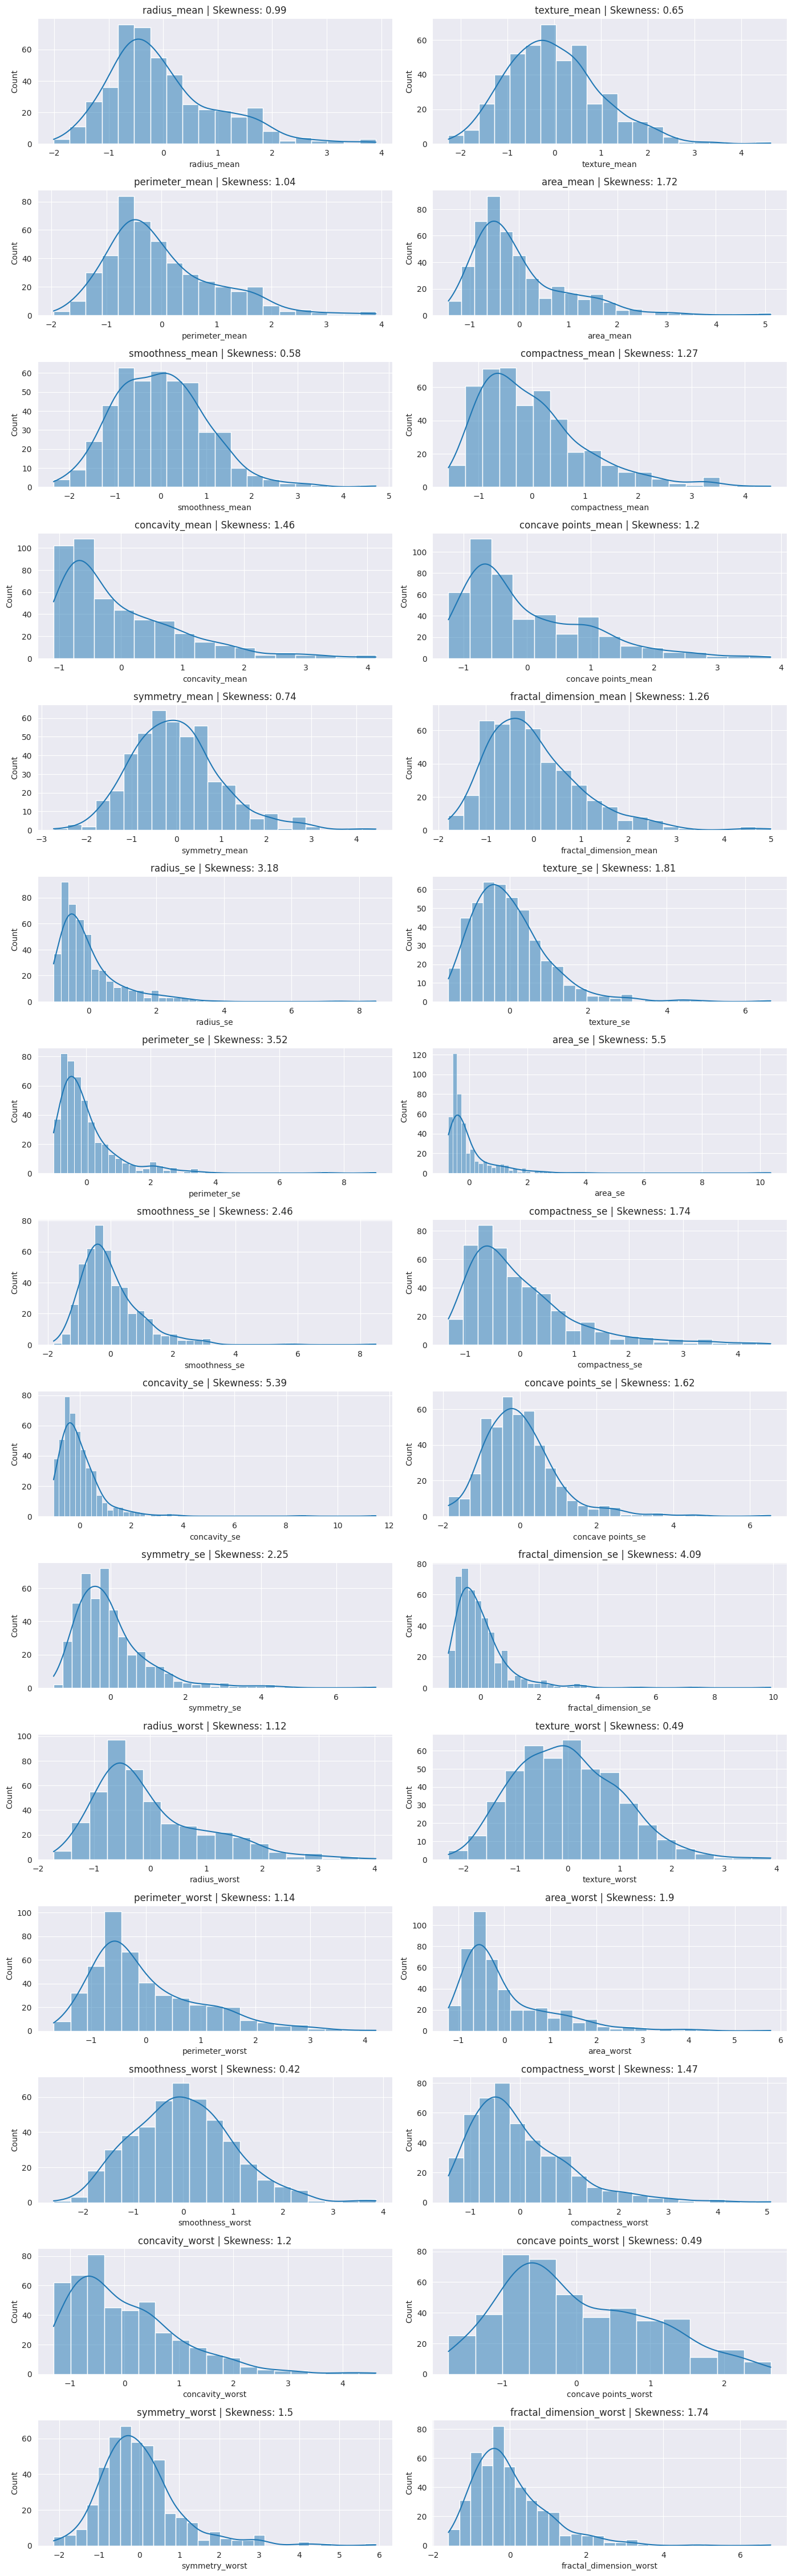

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

numerical_columns = X_train.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(X_train[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(X_train[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

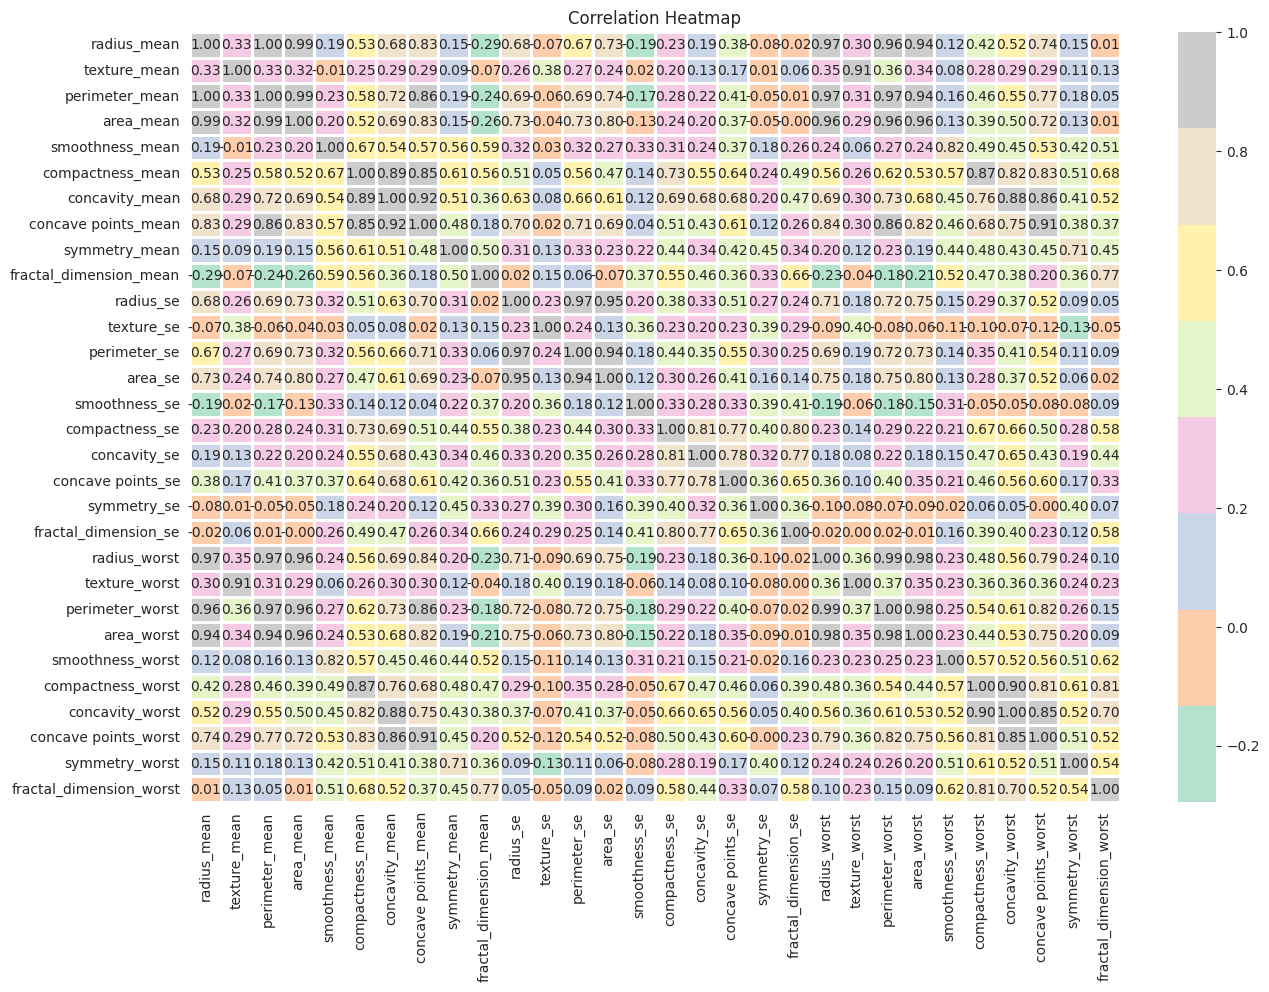

In [17]:
plt.figure(figsize=(15, 10))

sns.heatmap(X_train.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

## Benchmarks

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

def evaluate_model(name, estimator, param_grid, X_train, y_train, X_test, y_test):
    print(f"== {name} ==")
    grid = GridSearchCV(
        estimator=estimator,
        param_grid=param_grid,
        scoring='accuracy',
        cv=5,
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    best = grid.best_estimator_

    preds = best.predict(X_test)
    acc = accuracy_score(y_test, preds) * 100
    print(f"Accuracy : {acc:.2f} %")

    if hasattr(best, "predict_proba"):
        y_scores = best.predict_proba(X_test)[:, 1]
    else:
        y_scores = best.decision_function(X_test)
    auc = roc_auc_score(y_test, y_scores) * 100
    print(f"AUC      : {auc:.2f} %\n")

    return {
        'best_estimator': best,
        'params' : grid.best_params_,
        'accuracy' : acc,
        'auc' : auc
    }

In [19]:
param_grids = {
    'Logistic Regression': (
        LogisticRegression(max_iter=1000), {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }),
    'SVM': (
        SVC(), {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    }),
    'Decision Tree': (
        DecisionTreeClassifier(), {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 2, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Random Forest': (
        RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }),
    'AdaBoost': (
        AdaBoostClassifier(), {
        'n_estimators': [ 100, 200, 500, 1000],
        'learning_rate': [0.01, 0.1, 0.5, 1]
    }),
    'XGBoost': (
        XGBClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 1, 5],
        'reg_alpha': [0, 0.01, 0.1],
        'reg_lambda': [1, 1.5, 2.0]
    }),
    'KNN': (
        KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }),
    'MLP' : (
        MLPClassifier(n_iter_no_change=5, max_iter=10000, early_stopping=True), {
        'activation': ['relu', 'tanh', 'logistic'],
        'solver': ['adam', 'sgd', 'lbfgs'],
        'alpha': [1e-5, 1e-4, 1e-3, 1e-2],
        'learning_rate': ['constant', 'adaptive'],
        'learning_rate_init': [1e-4, 1e-3, 1e-2],
        'batch_size': [32, 64, 128],
        'momentum': [0.8, 0.9, 0.99],
        'nesterovs_momentum': [True]
    })
}

results = {}
for name, (model, grid) in param_grids.items():
    results[name] = evaluate_model(name, model, grid, X_train, y_train, X_test, y_test)

== Logistic Regression ==


Accuracy : 98.25 %
AUC      : 99.77 %

== SVM ==
Accuracy : 97.37 %
AUC      : 99.47 %

== Decision Tree ==
Accuracy : 95.61 %
AUC      : 94.05 %

== Random Forest ==
Accuracy : 97.37 %
AUC      : 99.82 %

== AdaBoost ==
Accuracy : 97.37 %
AUC      : 98.64 %

== XGBoost ==
Accuracy : 98.25 %
AUC      : 99.17 %

== KNN ==
Accuracy : 93.86 %
AUC      : 98.25 %

== MLP ==
Accuracy : 96.49 %
AUC      : 98.08 %



## Results visualisation

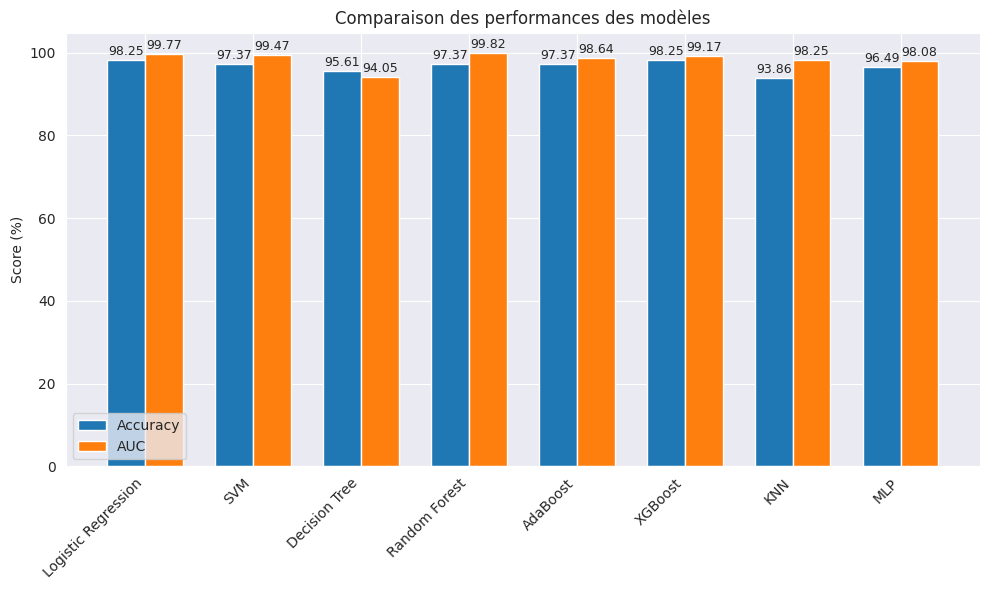

In [20]:
models = list(results.keys())
accuracies = [results[m]['accuracy'] for m in models]
aucs = [results[m]['auc'] for m in models]

x = list(range(len(models)))
width = 0.35  

plt.figure(figsize=(10, 6))
bars_acc = plt.bar([i - width/2 for i in x], accuracies, width, label='Accuracy')
bars_auc = plt.bar([i + width/2 for i in x], aucs, width, label='AUC')

def annot_bars(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.5,
            f"{height:.2f}",
            ha='center', va='bottom',
            fontsize=9
        )

annot_bars(bars_acc)
annot_bars(bars_auc)

plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel('Score (%)')
plt.title('Comparaison des performances des modèles')
plt.legend()
plt.tight_layout()

plt.show()
